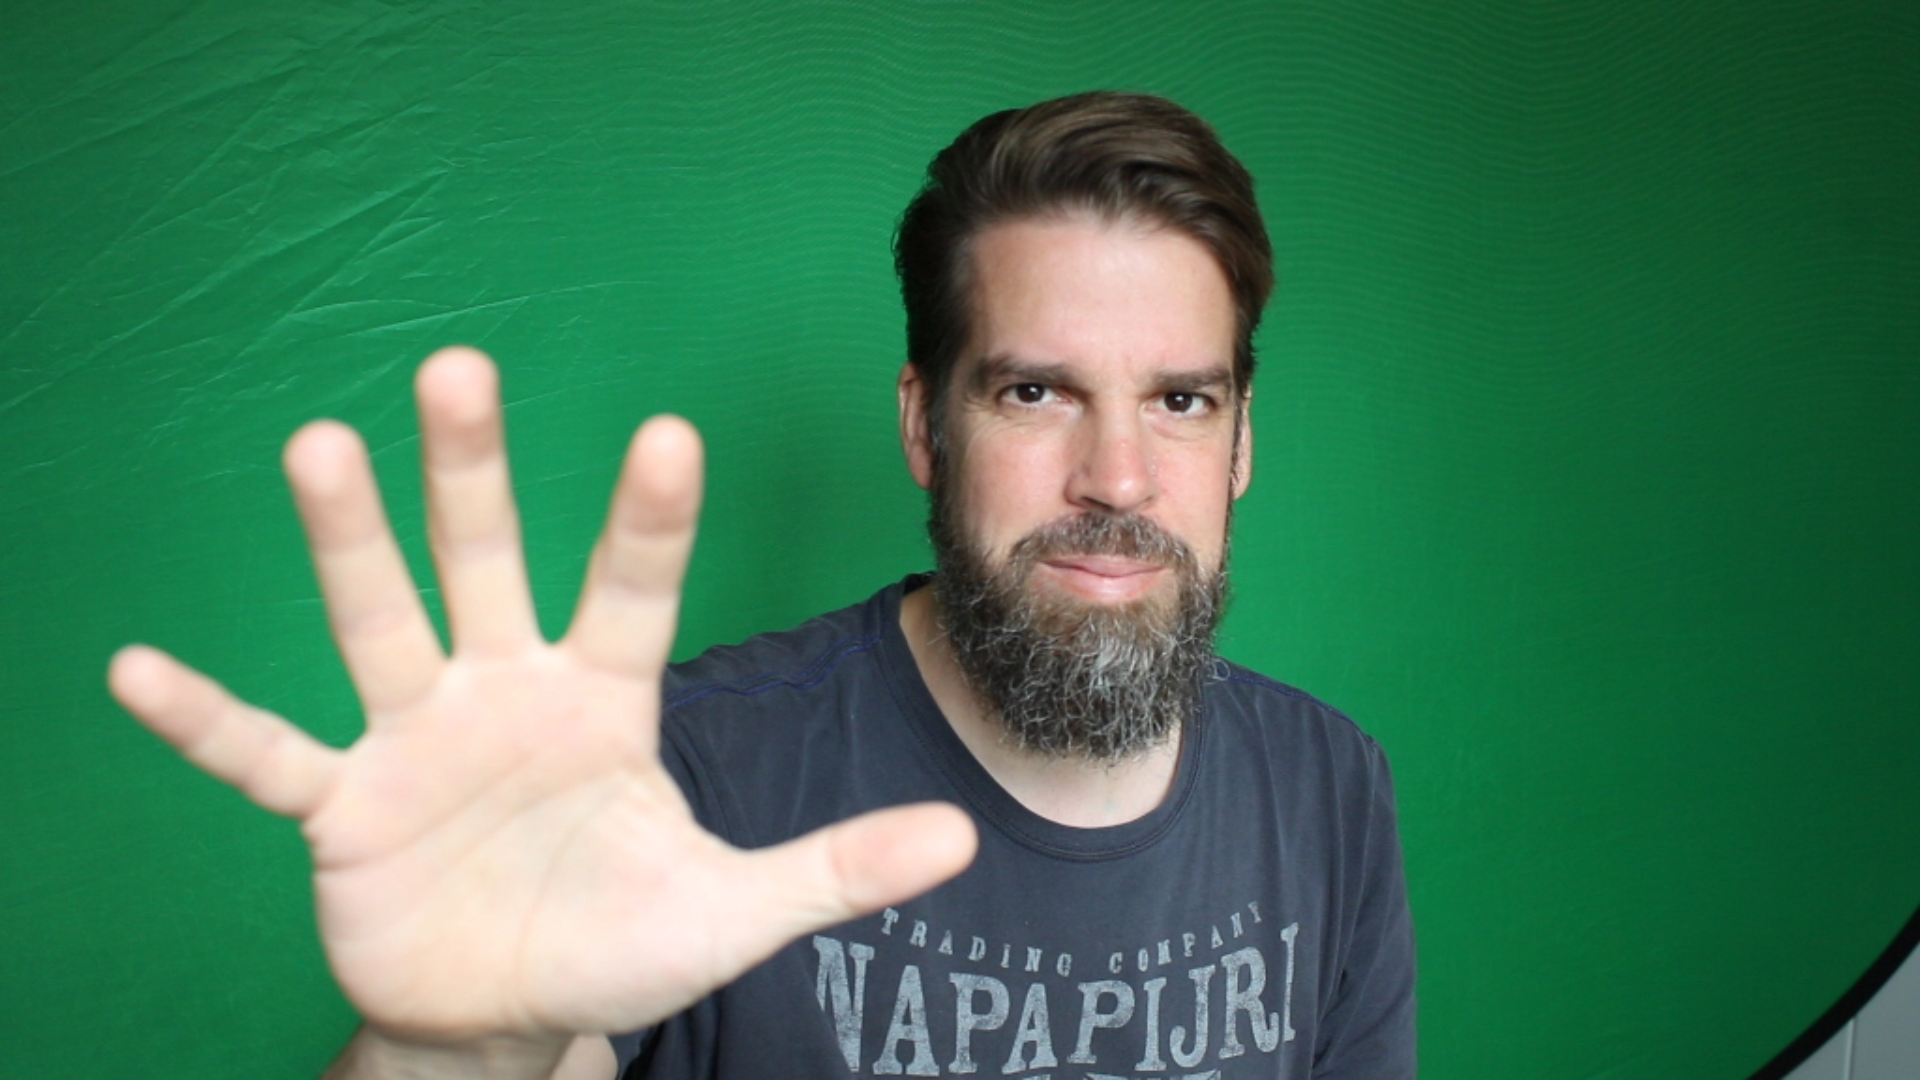

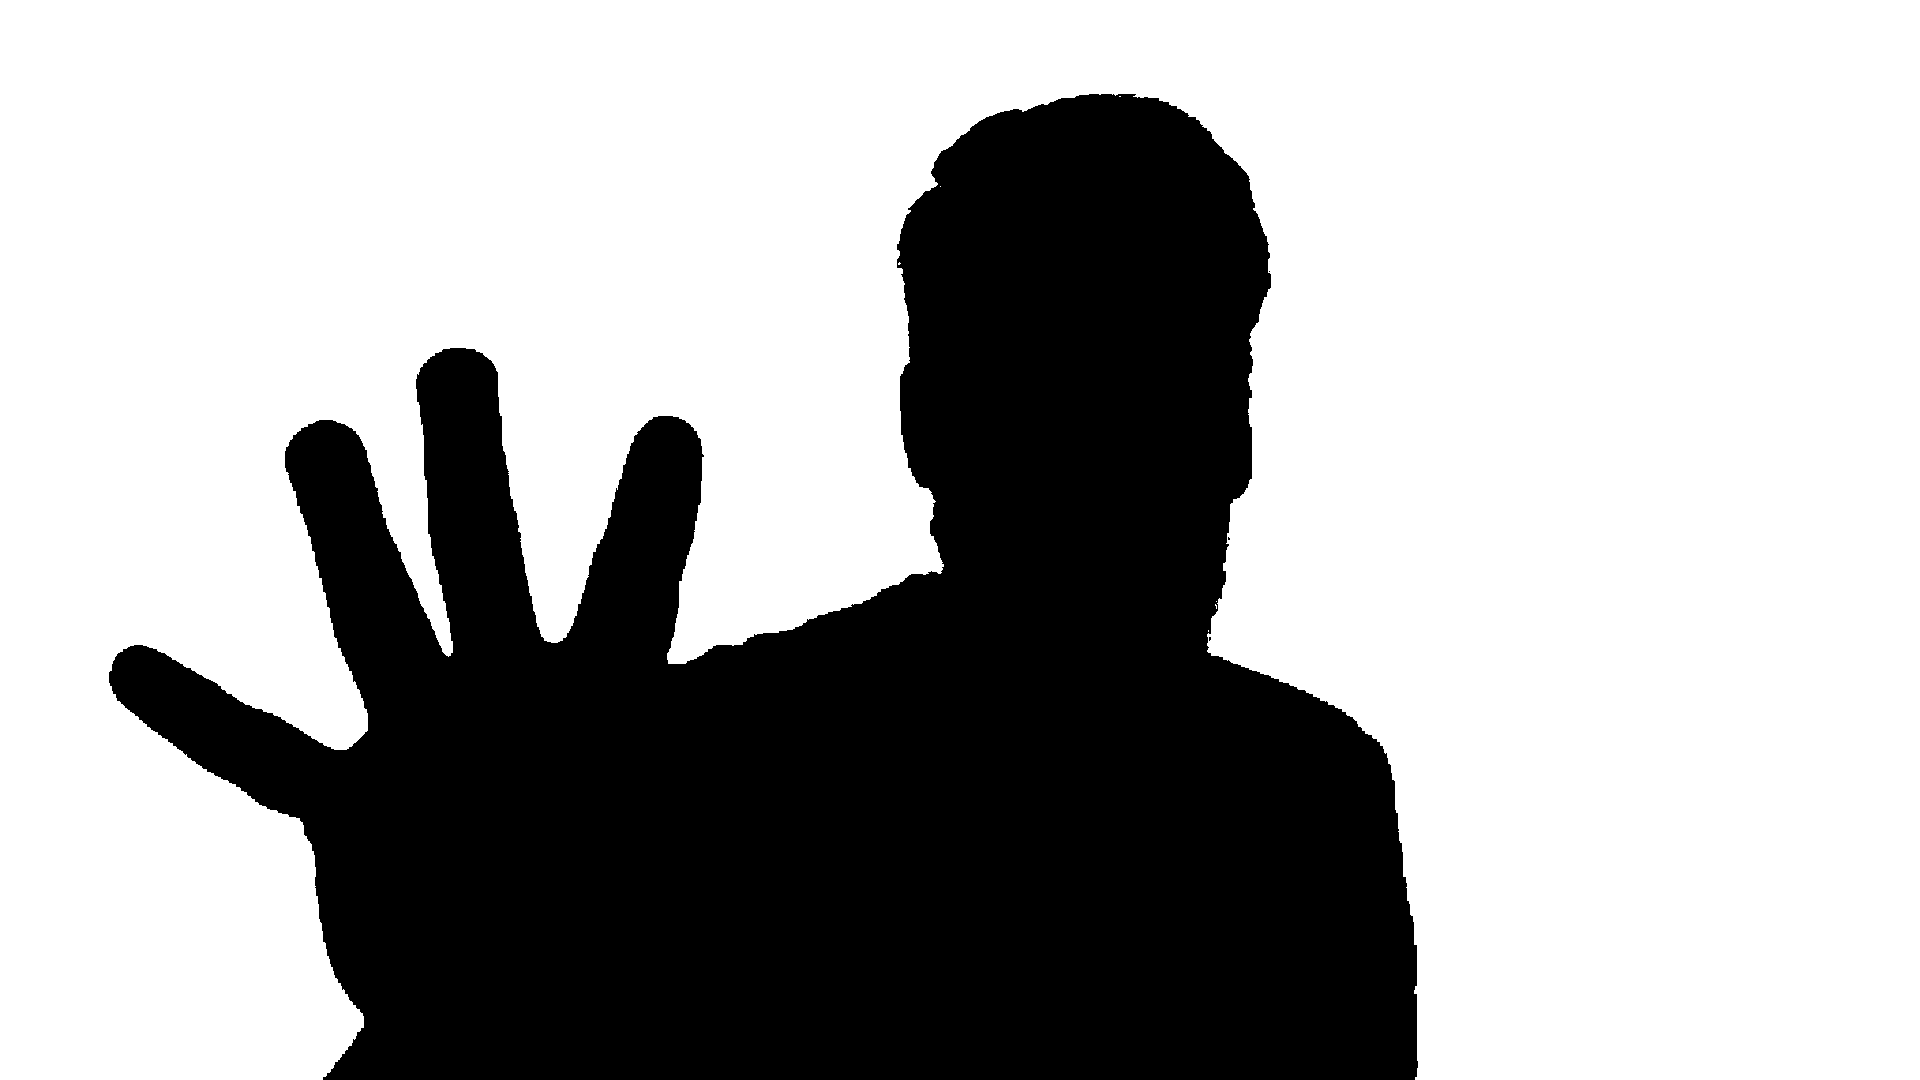

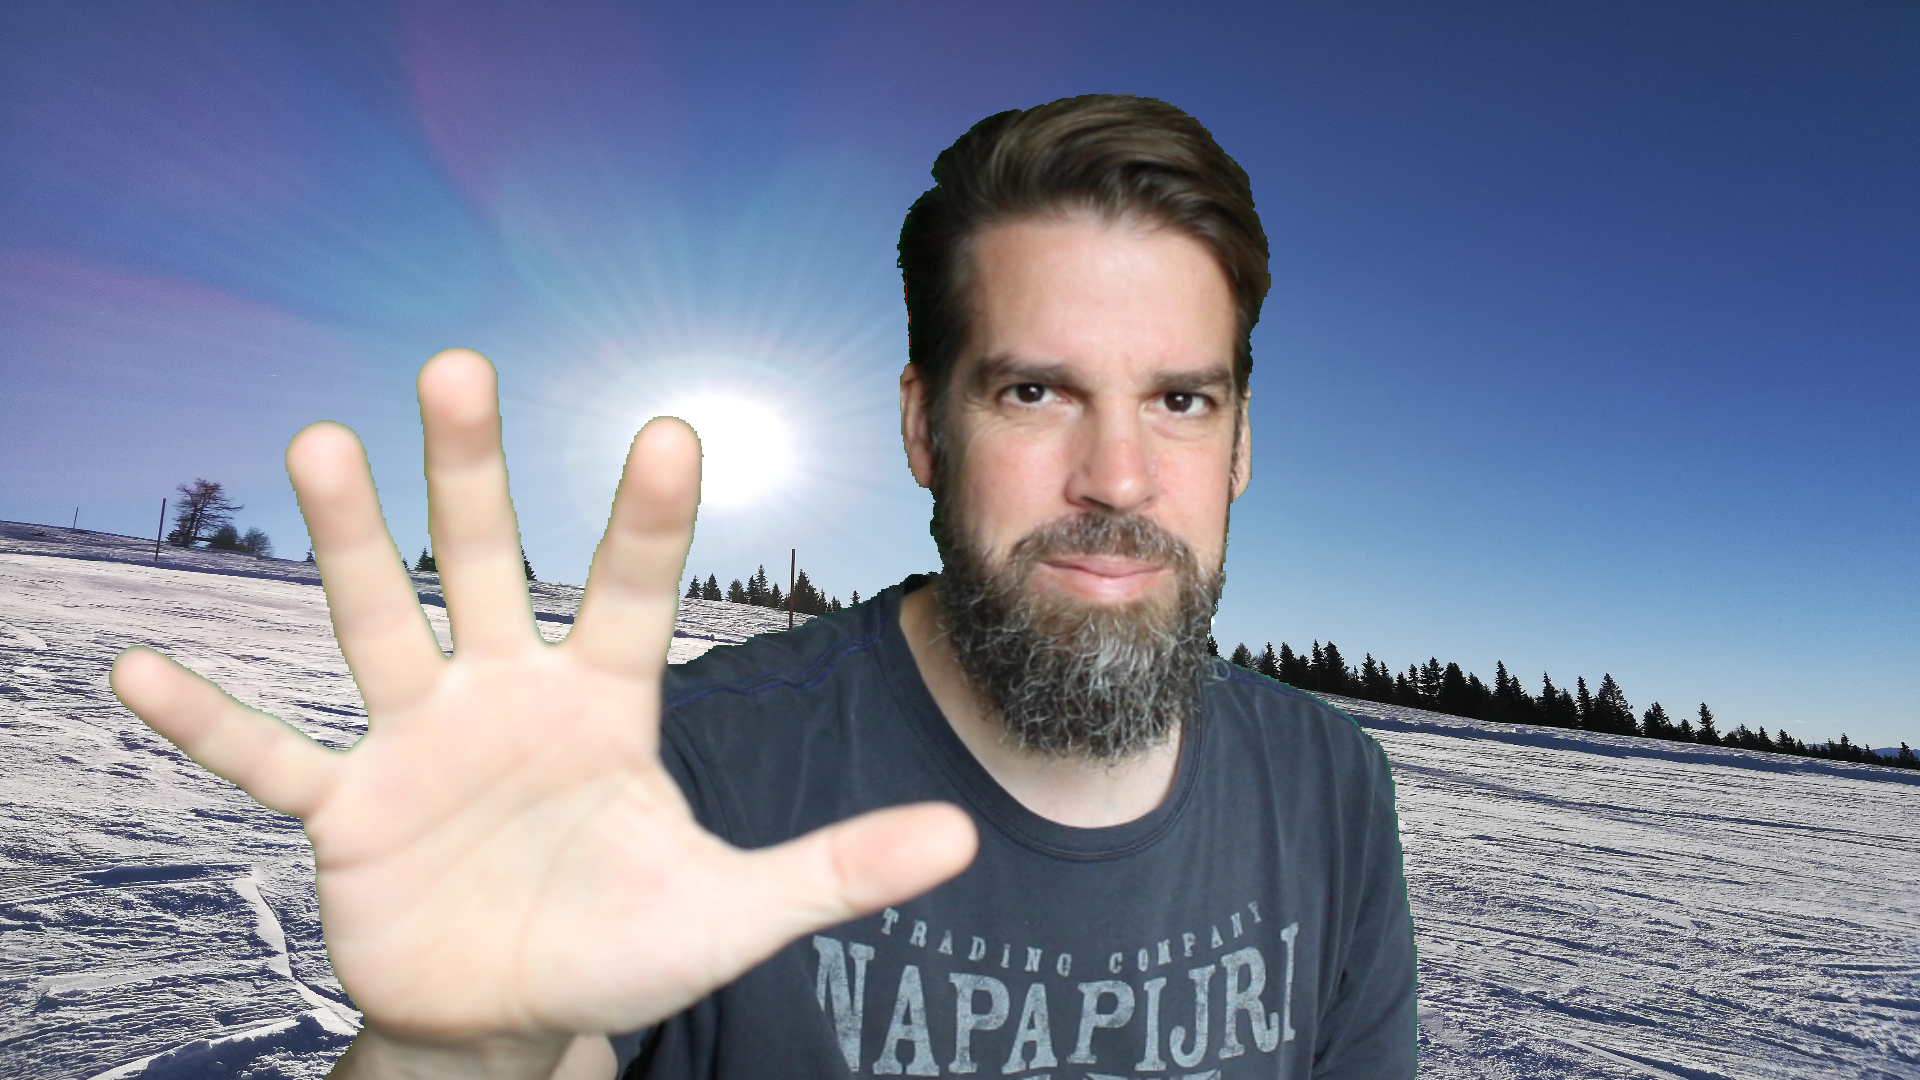

In [27]:
import cv2  
import numpy as np  
from IPython.display import Image, display
  
frame = cv2.imread("Training-unsharp.png") 
image = cv2.imread("IMG_20200105_133115.jpg") 
  
frame = cv2.resize(frame, (1920, 1080)) 
image = cv2.resize(image, (1920, 1080)) 
  
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

l_green = np.array([40, 50, 50]) 
u_green = np.array([80, 255, 255]) 

mask = cv2.inRange(hsv, l_green, u_green) 

h, w = frame.shape[:2]
fillmask = np.zeros((h + 2, w + 2), np.uint8)
frame = frame.astype("uint8")
cv2.floodFill(mask, fillmask, (1919, 1079), 255)
    
res = cv2.bitwise_and(frame, frame, mask = mask) 
  
f = frame - res 
f = np.where(f == 0, image, f) 

cv2.imwrite("result.png",frame)
display(Image(filename="result.png"))

cv2.imwrite("result.png",mask)
display(Image(filename="result.png"))

cv2.imwrite("result.png",f)
display(Image(filename="result.png"))
  
